<a href="https://colab.research.google.com/github/kumbieny/kumbieny/blob/main/Linear_classification_theory_in_Tensorflow_prediction_saving_loadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.9.1
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 511.7 MB 5.9 kB/s 
     |████████████████████████████████| 1.6 MB 57.5 MB/s 
     |████████████████████████████████| 5.8 MB 39.1 MB/s 
     |████████████████████████████████| 438 kB 51.3 MB/s 
2.9.1


In [2]:
#load in the data
from sklearn.datasets import load_breast_cancer

In [3]:
#load the data
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
#note: it is a bunch object
#this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
#'data' (the attribute) means the input data
data.data.shape

(569, 30)

In [7]:
data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [8]:
data.target_names
#their meaning is not lost

array(['malignant', 'benign'], dtype='<U9')

In [9]:
#there are also 569 corresponding targets
data.target.shape

(569,)

In [10]:
data.feature_names
#determining the meaning of each feature

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N,D = x_train.shape

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
#Now all the fun begins with Tensorflow stuff
#Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#Train the model
r=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)
#Evaluate the model - evaluate() returns loss and accuracy

print("Train score:", model.evaluate(x_train, y_train))
print("Train score:", model.evaluate(x_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 21ms/step - loss: 0.5872 - accuracy: 0.7087 - val_loss: 0.4953 - val_accuracy: 0.7447
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5299 - accuracy: 0.7480 - val_loss: 0.4482 - val_accuracy: 0.7819
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.7900 - val_loss: 0.4073 - val_accuracy: 0.8298
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8373 - val_loss: 0.3735 - val_accuracy: 0.8670
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4079 - accuracy: 0.8583 - val_loss: 0.3460 - val_accuracy: 0.8830
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3790 - accuracy: 0.8714 - val_loss: 0.3231 - val_accuracy: 0.8936
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 0.8819 - val_loss: 0.3038 - val_accuracy: 0.9043
Epoch 8/100


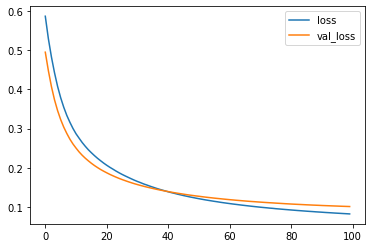

In [14]:
#plot what is returned by model.fit
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

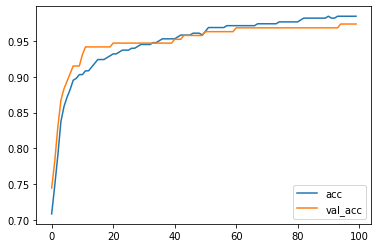

In [15]:
#plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Part 2: Making predictions

In [16]:
#make predictions
p = model.predict(x_test)
print(p)

6/6 [==============================] - 0s 2ms/step
[[9.80479956e-01]
 [9.99840975e-01]
 [9.97631192e-01]
 [9.80515838e-01]
 [4.76334214e-01]
 [9.80635405e-01]
 [9.99757171e-01]
 [9.88915861e-01]
 [9.69023883e-01]
 [9.68820572e-01]
 [9.92229521e-01]
 [7.34848320e-01]
 [9.32835007e-07]
 [8.44027221e-01]
 [9.77103889e-01]
 [9.95667934e-01]
 [1.76285207e-02]
 [1.60269544e-03]
 [9.98871803e-01]
 [9.54169691e-01]
 [9.82420504e-01]
 [8.47718060e-01]
 [9.55278516e-01]
 [9.93006527e-01]
 [9.99096692e-01]
 [9.55899298e-01]
 [9.90340829e-01]
 [9.60361838e-01]
 [9.70531881e-01]
 [4.15399609e-06]
 [7.32712579e-05]
 [9.92707729e-01]
 [2.61551701e-03]
 [9.98713970e-01]
 [9.76337671e-01]
 [9.54377583e-07]
 [9.98989940e-01]
 [9.84274149e-01]
 [7.31961602e-09]
 [9.94677603e-01]
 [8.29037964e-01]
 [1.60820819e-02]
 [9.87341166e-01]
 [2.62139361e-06]
 [9.77905989e-01]
 [3.11328411e-01]
 [9.95281458e-01]
 [9.86241460e-01]
 [9.58213687e-01]
 [9.93200004e-01]
 [2.86634272e-09]
 [6.04263902e-01]
 [9.99335825e

In [17]:
import numpy as np
p =  np.round(p).flatten()
print(p)

[1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0.]


In [18]:
#calculate the accuracy
print("Manually calculated accuracy:", np.mean(p==y_test))
print("Evaluate output:", model.evaluate(x_test, y_test))

Manually calculated accuracy: 0.973404255319149
6/6 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9734
Evaluate output: [0.10068655759096146, 0.9734042286872864]


Part 3: Saving and Loading model

In [19]:
#Lets now save our model to a file
model.save('linearclassifier.h5')

In [20]:
#check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul 18 08:26 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Jul 13 13:43 sample_data


In [21]:
#let us load the model and confirm that it still works
model = tf.keras.models.load_model("linearclassifier.h5")
print(model.layers)
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9734


[0.10068655759096146, 0.9734042286872864]